In [85]:
!pip install basedosdados

import basedosdados as bd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact



import json

In [ ]:
bd.list_datasets()


dataset_id: 
	br_abrinq_oca 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_ana_atlas_esgotos 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_anvisa_medicamentos_industrializados 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_bd_diretorios_brasil 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_camara_atividade_legislativa 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_camara_dados_abertos 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_cgu_servidores_executivo_federal 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_geobr_mapas 
-

In [59]:
idh_municipios = bd.read_table(dataset_id='mundo_onu_adh', 
                                       table_id='municipios', 
                                       billing_project_id='steam-snowfall-306819')



Downloading: 100%|██████████| 16695/16695 [00:01<00:00, 11529.62rows/s]


In [60]:
idh_municipios.head(5)

,id_municipio,ano,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,expectativa_anos_estudo,taxa_analfabetismo_11_a_14,taxa_analfabetismo_15_a_17,taxa_analfabetismo_15_mais,taxa_analfabetismo_18_a_24,taxa_analfabetismo_18_mais,taxa_analfabetismo_25_a_29,taxa_analfabetismo_25_mais,taxa_atraso_0_basico,taxa_atraso_0_fundamental,taxa_atraso_0_medio,taxa_atraso_1_basico,taxa_atraso_1_fundamental,taxa_atraso_1_medio,taxa_atraso_2_basico,taxa_atraso_2_fundamental,taxa_atraso_2_medio,taxa_freq_bruta_basico,taxa_freq_bruta_fundamental,taxa_freq_bruta_medio,taxa_freq_bruta_pre,taxa_freq_bruta_superior,taxa_freq_liquida_basico,taxa_freq_liquida_fundamental,taxa_freq_liquida_medio,taxa_freq_liquida_pre,taxa_freq_liquida_superior,taxa_freq_0_3,taxa_freq_11_14,taxa_freq_15_17,...,populacao_mulheres,populacao_1_menos,populacao_11_14,populacao_11_13,populacao_12_14,populacao_1_3,populacao_15_mais,populacao_15_17,populacao_15_24,populacao_16_18,populacao_18_mais,populacao_18_20,populacao_18_24,populacao_19_21,populacao_25_mais,populacao_4,populacao_5,populacao_6,populacao_6_10,populacao_6_17,populacao_65_mais,populacao,populacao_urbana,populacao_rural,populacao_dom_pp,populacao_dom_pp_exc_renda_nula,pea,pea_10_14,pea_15_17,pea_18_mais,pia,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
0,1100015,1991,62.01,4.08,45.58,58.05,73.50,83.81,66.87,1.82,6.68,9.74,8.35,23.55,10.82,25.71,15.59,31.39,30.32,33.34,53.26,24.96,27.33,16.63,44.72,39.33,30.11,62.66,76.98,10.28,8.69,0.28,57.69,65.24,3.60,8.69,0.28,NaN,66.19,31.22,...,11146,700,2387,1816,1771,1986,14000,1742,5128,1709,12258,1571,3386,1467,8872,633,604,634,3238,7367,428,23546,9379,14167,23417,22835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117,0.109,0.329,0.112,0.617,0.516
1,1100023,1991,66.02,3.72,32.39,41.41,69.97,88.08,74.23,1.82,7.86,9.35,7.64,17.18,8.00,18.37,10.55,22.32,37.37,40.76,45.41,25.11,26.42,44.13,37.52,32.82,10.45,69.79,82.18,25.02,17.94,2.09,62.78,69.19,11.63,17.94,0.71,NaN,73.34,41.92,...,27318,1614,5636,4279,4131,4624,34461,3811,12268,3818,30650,3699,8458,3663,22193,1546,1535,1449,7399,16845,1035,56812,45283,11529,56061,55018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200,0.199,0.432,0.199,0.684,0.593
2,1100031,1991,63.16,3.89,41.52,52.94,77.23,85.09,69.00,2.59,7.43,9.62,6.19,24.57,10.06,27.10,17.42,32.93,30.16,34.61,38.77,22.85,26.43,22.93,46.99,38.96,38.30,70.05,87.14,7.71,0.00,0.64,64.99,70.97,2.62,0.00,0.64,NaN,71.35,45.55,...,3584,202,759,581,567,602,4530,549,1563,548,3981,492,1014,427,2967,229,214,224,1140,2448,199,7676,1916,5760,7601,5846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111,0.106,0.309,0.108,0.636,0.430
3,1100049,1991,65.03,3.81,35.37,45.19,71.11,87.08,72.44,2.47,8.34,6.32,6.70,21.41,9.22,23.29,14.32,28.50,38.33,43.08,57.92,22.61,25.10,29.66,39.06,31.82,12.42,71.98,87.32,20.55,9.37,2.99,64.36,70.89,8.35,9.37,0.72,NaN,71.44,45.40,...,34032,1874,6916,5331,5133,5555,42469,4822,15000,4618,37647,4452,10178,4411,27469,1858,1850,1829,9203,20941,1720,69725,42689,27036,69173,66534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.176,0.169,0.407,0.171,0.667,0.593
4,1100056,1991,62.73,3.55,43.00,54.82,71.09,84.62,68.20,2.46,8.14,5.06,4.83,20.26,8.17,22.29,12.31,27.32,37.35,42.07,48.91,24.03,26.61,29.95,38.63,31.32,21.14,71.66,86.65,22.17,6.34,0.32,67.18,73.72,10.05,6.34,0.32,NaN,75.84,46.62,...,9367,496,1917,1458,1415,1511,11799,1367,4110,1304,10432,1210,2743,1143,7689,523,543,533,2582,5866,477,19371,14055,5316,19451,19030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.152,0.175,0.386,0.167,0.629,0.547


In [61]:
query_idh_municipios = "SELECT DISTINCT id_municipio, ano, idhm, idhm_e, idhm_l, idhm_r  FROM `basedosdados.mundo_onu_adh.municipios`;"

df_idh_municipios = bd.read_sql(query=query_idh_municipios, billing_project_id='steam-snowfall-306819')

Downloading: 100%|██████████| 16695/16695 [00:01<00:00, 13607.46rows/s]


In [92]:
df_idh_municipios.head(5)

,id_municipio,ano,idhm,idhm_e,idhm_l,idhm_r
0,1100015,1991,0.329,0.112,0.617,0.516
1,1100023,1991,0.432,0.199,0.684,0.593
2,1100031,1991,0.309,0.108,0.636,0.430
3,1100049,1991,0.407,0.171,0.667,0.593
4,1100056,1991,0.386,0.167,0.629,0.547


- idhm    -> Municipal
- idhm_e  -> Educação
- idhm_l  -> Longevidade
- idhm_r  -> Renda

In [93]:
query_info_municipios = "SELECT DISTINCT id_municipio, municipio, capital_uf, uf, regiao, microrregiao, mesorregiao  FROM `basedosdados.br_bd_diretorios_brasil.municipio`;"

df_info_municipios = bd.read_sql(query=query_info_municipios, billing_project_id='steam-snowfall-306819')

Downloading: 100%|██████████| 5570/5570 [00:01<00:00, 4761.99rows/s]


In [94]:
df_total_municipios = df_idh_municipios.merge(df_info_municipios, left_on='id_municipio', right_on='id_municipio')

In [95]:
df_total_municipios.head(5)

,id_municipio,ano,idhm,idhm_e,idhm_l,idhm_r,municipio,capital_uf,uf,regiao,microrregiao,mesorregiao
0,1100015,1991,0.329,0.112,0.617,0.516,Alta Floresta D'Oeste,0,Rondônia,Norte,Cacoal,Leste Rondoniense
1,1100015,2000,0.483,0.262,0.698,0.617,Alta Floresta D'Oeste,0,Rondônia,Norte,Cacoal,Leste Rondoniense
2,1100015,2010,0.641,0.526,0.763,0.657,Alta Floresta D'Oeste,0,Rondônia,Norte,Cacoal,Leste Rondoniense
3,1100023,1991,0.432,0.199,0.684,0.593,Ariquemes,0,Rondônia,Norte,Ariquemes,Leste Rondoniense
4,1100023,2000,0.556,0.343,0.742,0.674,Ariquemes,0,Rondônia,Norte,Ariquemes,Leste Rondoniense


In [65]:
anos = [1991, 2000, 2010]

lista_medias_municipio = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm"].mean()\
                for ano in anos]

lista_medias_municipio_e = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm_e"].mean()\
                for ano in anos]

lista_medias_municipio_l = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm_l"].mean()\
                for ano in anos]

lista_medias_municipio_r = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm_r"].mean()\
                for ano in anos]


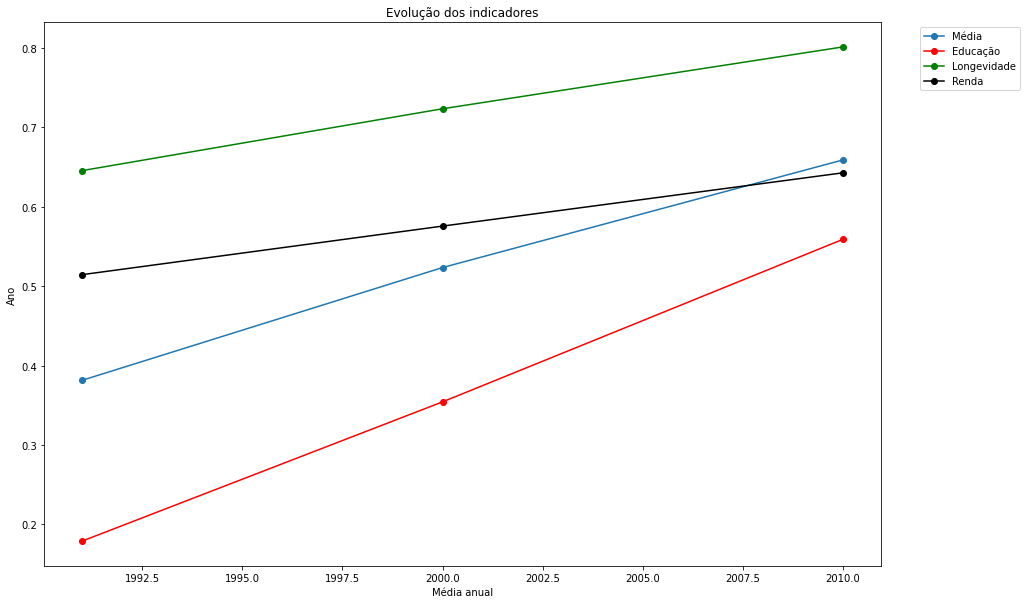

In [66]:
fig, (ax0) = plt.subplots(nrows = 1,
                            ncols = 1,
                            figsize = (15,10),
                             sharex = True)

scatter = ax0.plot(anos, 
                   lista_medias_municipio, 
                   marker='o', 
                   label='Média')


scatter = ax0.plot(anos,lista_medias_municipio_e, 
                   c = 'red', 
                   marker='o', 
                   label='Educação')

scatter = ax0.plot(anos, 
                   lista_medias_municipio_l,
                   c = 'green', 
                   marker='o', 
                   label='Longevidade')

scatter = ax0.plot(anos, 
                   lista_medias_municipio_r, 
                   c = 'black', 
                   marker='o', 
                   label='Renda')

ax0.set(title = 'Evolução dos indicadores',
        xlabel = 'Média anual',
       ylabel = 'Ano')

ax0.legend(bbox_to_anchor = (1.04,1))


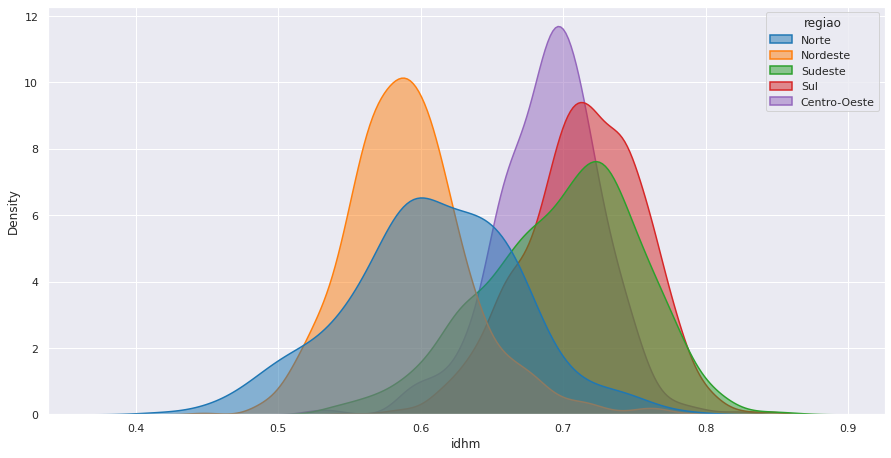

In [84]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.kdeplot(data = df_total_municipios.loc[df_total_municipios["ano"]==2010], 
                  x= "idhm",
                  hue = 'regiao',
                  palette = "tab10",
                  fill = True, 
                  common_norm = False, 
                  alpha = .5, 
                  linewidth = 1.5)



In [90]:
def f(ano):
  sns.set_theme(style="darkgrid")

  fig, ax = plt.subplots(figsize = (15,7.5))

  ax = sns.kdeplot(data = df_total_municipios.loc[df_total_municipios["ano"]==ano], 
                    x= "idhm",
                    hue = 'regiao',
                    palette = "tab10",
                    fill = True, 
                    common_norm = False, 
                    alpha = .5, 
                    linewidth = 1.5)

  plt.show()
interact(f, ano = [1991,2000, 2010])

interactive(children=(Dropdown(description='ano', options=(1991, 2000, 2010), value=1991), Output()), _dom_cla…

<function __main__.f>

In [ ]:
with open("./imports/id_municipios.json", mode="r") as f:
  ID_MUN = json.load(f)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ID_MUN["1100015"]

NameError: ignored

# Testes

In [ ]:
despesas_orcamentarias = bd.read_table(dataset_id='br_tesouro_finbra', 
                                       table_id='despesas_orcamentarias', 
                                       billing_project_id='steam-snowfall-306819')


Downloading: 100%|██████████████████████████████████████████████████████| 5763724/5763724 [06:38<00:00, 14464.53rows/s]


In [ ]:
despesas_orcamentarias.head(5)

,id_municipio,sigla_uf,ano,populacao,coluna,id_conta,conta,valor
0,1100015,RO,2014,25652,Despesas Empenhadas,3.3.90.49.00.00,Auxílio-Transporte,166832.00
1,1100015,RO,2014,25652,Despesas Liquidadas,3.3.90.49.00.00,Auxílio-Transporte,166832.00
2,1100015,RO,2014,25652,Despesas Pagas,3.3.90.49.00.00,Auxílio-Transporte,166832.00
3,1100031,RO,2014,6424,Despesas Empenhadas,3.3.20.00.00.00,Transferências à União,71701.78
4,1100031,RO,2014,6424,Despesas Empenhadas,3.3.30.81.00.00,Distribuição Constitucional ou Legal de Receitas,235376.73


# Descrição dos dados

- **Despesa Empenhada**: Valor do orçamento público formalmente reservado (pela emissão do empenho) para compromissos assumidos com terceiros.
	
- **Despesa Liquidada**: É a verificação do direito adquirido pelo credor de receber o pagamento. É o segundo estágio da execução da despesa, precedido do empenho e antecedido do pagamento.

In [ ]:
despesas_orcamentarias.to_csv('./Dados/despesas_orcamentarias.csv',sep=';',index=False)

In [ ]:
despesas_orcamentarias.shape

(5763724, 8)

In [ ]:
despesas_orcamentarias["conta"].value_counts().keys()[:50]

Index(['Aplicações Diretas', 'Outros Serviços de Terceiros - Pessoa Jurídica',
       'Despesas Correntes', 'Outras Despesas Correntes',
       'Material de Consumo', 'Despesas de Capital', 'Investimentos',
       'Pessoal e Encargos Sociais',
       'Outros Serviços de Terceiros - Pessoa Física',
       'Total Geral da Despesa', 'Equipamentos e Material Permanente',
       'Obras e Instalações', 'Despesas de Exercícios Anteriores',
       'Obrigações Patronais', 'Vencimentos e Vantagens Fixas - Pessoal Civil',
       'Sentenças Judiciais', 'Obrigações Tributárias e Contributivas',
       'Material, Bem ou Serviço para Distribuição Gratuita',
       'Diárias - Civil', 'Amortização da Dívida',
       'Indenizações e Restituições',
       'Transferências a Consórcios Públicos mediante contrato de rateio',
       'Contribuições Previdenciárias - INSS',
       'Principal da Dívida Contratual Resgatado',
       'Contratação por Tempo Determinado',
       'Transferências a Instituições Priva

In [ ]:
despesas_orcamentarias["coluna"].value_counts()

Despesas Empenhadas                            1517018
Despesas Liquidadas                            1514346
Despesas Pagas                                 1510567
Inscrição de RP Processados                     407857
Inscrição de Restos a Pagar Processados         329771
Inscrição de RP Não Processados                 267706
Inscrição de Restos a Pagar Não Processados     216459
Name: coluna, dtype: int64